In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from fbprophet import Prophet

In [2]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [3]:
wmt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,11815.000000,11815.000000,11815.000000,11815.000000,11815.000000,1.181500e+04
mean,29.942336,30.226543,29.658511,29.948090,24.052813,7.510762e+06
std,29.802418,30.051176,29.566506,29.811830,26.403796,6.327371e+06
min,0.015625,0.015625,0.014404,0.015625,0.005798,0.000000e+00
25%,1.265625,1.281250,1.253906,1.265625,0.513472,3.753600e+06
50%,13.718750,13.843750,13.562500,13.687500,8.964169,6.263200e+06
75%,54.000000,54.570000,53.500000,54.000000,40.389094,9.515000e+06
max,111.489998,112.220001,111.029999,111.599998,111.599998,1.318336e+08


* use only `Date` and `Adj Close` columns

In [4]:
df = wmt[['Date','Adj Close']]

* rename columns to fit Prophet naming convention

In [5]:
df = df.rename(columns = {'Date': 'ds',
                         'Adj Close': 'y'})

* convert date to datetime

In [6]:
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
df.head()

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047


* plot time-series

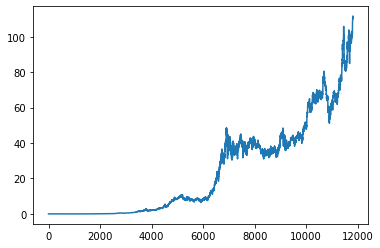

In [8]:
plt.plot(df['y'])

* instantiate Prophet

In [9]:
from fbprophet import Prophet

In [10]:
model = Prophet()

* fit model

In [11]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


* forecast 365 values in future 

In [12]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

* plot forecast

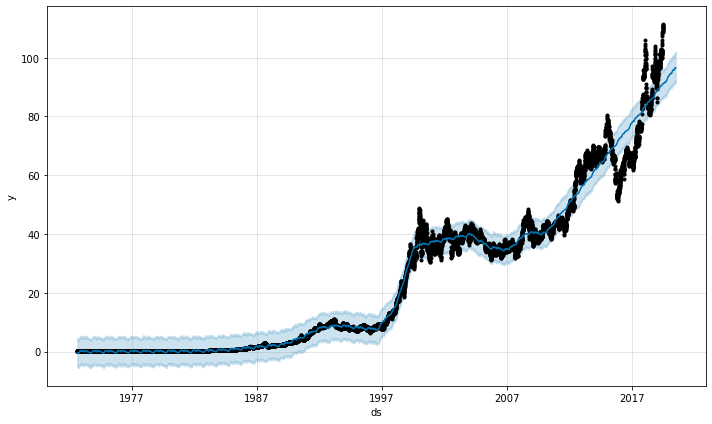

In [13]:
fig1 = model.plot(forecast)

* plot components

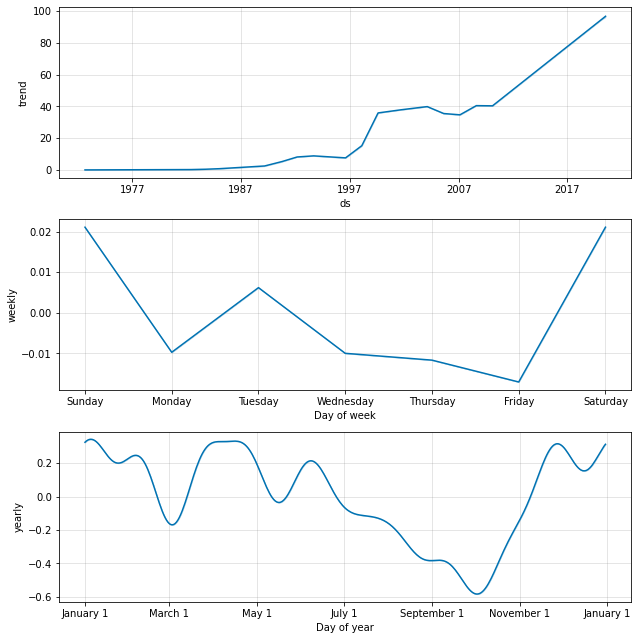

In [14]:
fig2 = model.plot_components(forecast)


- Compare the Prophet prediction vs Arima. Use the last 7 values we have in the timeseries as ground truth.